<a href="https://colab.research.google.com/github/sdias22/Processamento-Digital-de-Img/blob/main/03_pratica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 03 - Histogramas e Equalização

Neste *notebook*, vamos calcular histogramas dos níveis de cinza de imagens para para "melhorar" a visualização de imagens com "pouco contraste".

Uma técnica aplicada é chamada de **equalização de histograma**.

O primeiro passo é importar as bibliotecas necessárias para fazer os experimentos desta aula.

In [1]:
from skimage import io
from google.colab.patches import cv2_imshow
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

No exemplo abaixo, abrimos a nossa imagem de exemplo.

A imagem encontra-se no seguinte link:
https://drive.google.com/u/3/uc?id=1AabXYkvemO0hCDZC5iYJKP0xdOQsdJt7&export=download

(571, 800, 3)


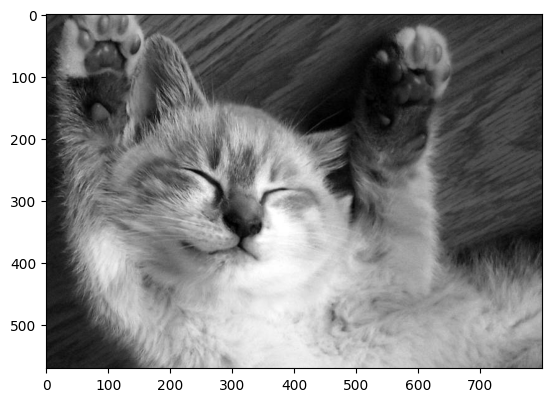

In [2]:
url = "https://drive.google.com/u/3/uc?id=1AabXYkvemO0hCDZC5iYJKP0xdOQsdJt7&export=download"
im = io.imread(url)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) # RGB
print (im.shape)
plt.imshow (im[:,:,0], 'gray')

No trecho abaixo, escolhemos um recorte da imagem.

(400, 640)


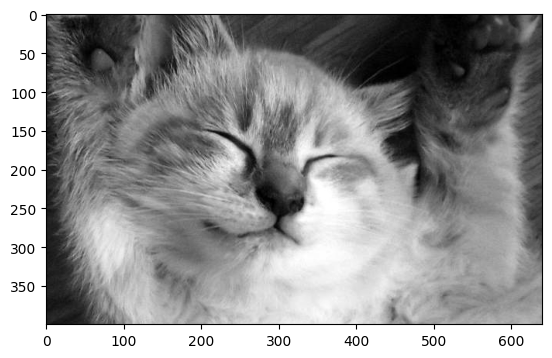

In [3]:
# escolhemos um recorte para teste
imCut = im[100:500,15:655,0]
print (imCut.shape)
plt.imshow (imCut, 'gray')

### Histograma

O que é um histograma de uma imagem?

Basicamente, é a contagem da quantidade de pixels para cada cor.

Podemos afirmar também que um histograma das cores exibe uma "distribuição" dos níveis de cinza da imagem: quantos pixels existem para cada nível de cinza?

Especificamente, calcularemos a quantidade de pixels para cada nível de cinza (de 0 até 255) e exibir esta informação em um gráfico de histograma.


In [4]:
# o primeiro passo eh converter a matriz em um vetor, ou seja, 2D array para 1D
vetor = imCut.ravel ()
print (vetor.shape)

(256000,)


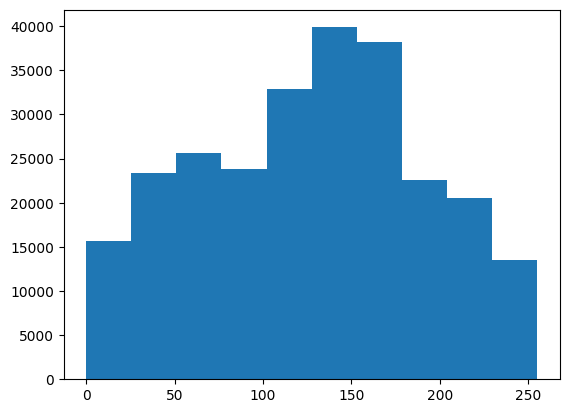

In [5]:
# agora podemos fazer o histograma
plt.hist(vetor)
plt.show()

No trecho abaixo, calcularemos a quantidade de pixels para cada nível de cinza, de 0 até 255.

O resultado é um vetor com 256 posições, cada posição indica o nível e o conteúdo é a quantidade.

Por exemplo, ```freq[0]``` é a quantidade de pixels pretos (nível de cinza zero).

Outro exemplo, ```freq[255]``` é a quantidade de pixels brancos (nível de cinza 255).

In [6]:
# calculo das frequencias para cada nivel de cinza
freq = [0] * 256
h, w = imCut.shape
for i in range(h):
  for j in range(w):
    freq[imCut[i][j]] += 1
print (freq)

[154, 311, 485, 455, 500, 612, 657, 724, 731, 679, 650, 725, 735, 747, 725, 642, 576, 622, 624, 621, 573, 607, 588, 584, 670, 651, 661, 729, 694, 722, 763, 770, 805, 839, 951, 914, 927, 927, 960, 950, 965, 930, 958, 1070, 1119, 1163, 1159, 1141, 1064, 1128, 1107, 1128, 1061, 1028, 984, 1048, 1006, 950, 985, 1006, 971, 964, 911, 1010, 1013, 983, 933, 956, 917, 1033, 1021, 988, 926, 992, 989, 947, 920, 921, 930, 940, 905, 921, 903, 985, 950, 914, 880, 925, 889, 902, 955, 941, 921, 926, 909, 962, 957, 1002, 1017, 1077, 1082, 1081, 1049, 1111, 1141, 1158, 1128, 1136, 1169, 1167, 1200, 1246, 1243, 1255, 1258, 1328, 1304, 1295, 1325, 1342, 1402, 1319, 1325, 1370, 1380, 1350, 1415, 1432, 1418, 1414, 1454, 1514, 1439, 1446, 1489, 1498, 1513, 1580, 1633, 1576, 1595, 1697, 1765, 1743, 1735, 1706, 1724, 1699, 1740, 1631, 1638, 1628, 1600, 1607, 1566, 1519, 1552, 1477, 1472, 1548, 1572, 1624, 1514, 1624, 1674, 1625, 1575, 1527, 1524, 1527, 1494, 1402, 1407, 1274, 1260, 1258, 1310, 1160, 1131, 1112

Vamos ver a quantidade de pixels com nível de cinza 150?

Execute o trecho de código abaixo e veja o resultado.

In [7]:
print (freq[150])

1638


Podemos plotar o resultado da contagem obtida anteoriormente.

Note que temos um resultado visual mais "detalhado" que o histograma... o que vc acha?

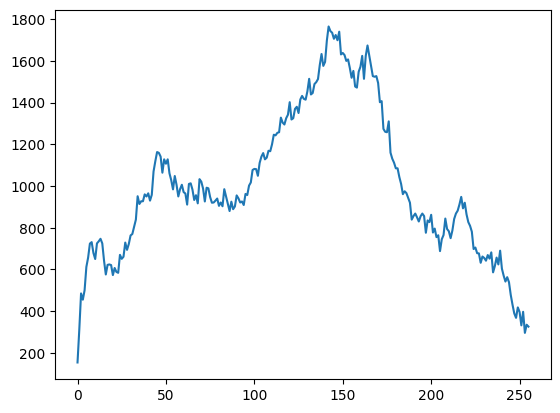

In [8]:
plt.plot(freq)

### Exemplo de imagem "escura"

Para ilustrar, vamos criar uma imagem "escura", com pouco contraste.

Para isto, vamos aproveitar o exemplo da aula passada.

O trecho de código abaixo reproduzirá o experimento de quantização visto na aula passada...

In [9]:
# exemplo de quantizacao feito na aula passada

imagesQ = [imCut]
print ("nivel max: ", np.max(imCut))
for k in range (7):
  h, w = imagesQ[k].shape
  imtmp = np.zeros((h,w),dtype='uint8')
  for i in range (h):
    for j in range (w):
      imtmp[i][j] = imagesQ[k][i][j] // 2
  print ("nivel max: ", np.max(imtmp))
  imagesQ.append (imtmp.copy ())

nivel max:  255
nivel max:  127
nivel max:  63
nivel max:  31
nivel max:  15
nivel max:  7
nivel max:  3
nivel max:  1


No trecho de código a seguir, exibiremos os resultados obtidos.

Escolheremos uma imagem escura deste experimento, que ainda seja "visível".

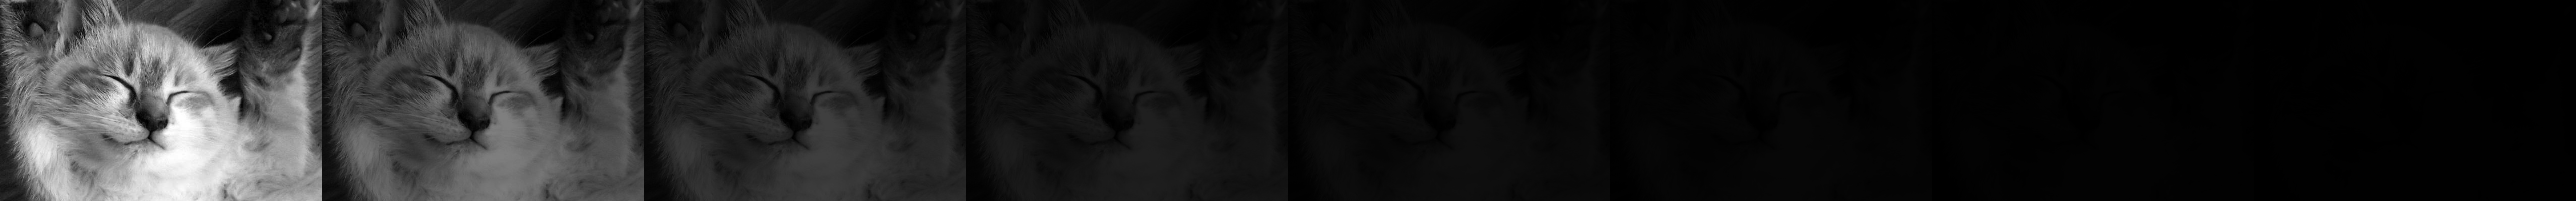

In [10]:
# exibe os resultados um ao lado do outro
cont = 0
for img in imagesQ:
  if cont == 0:
    result = img.copy()
  else:
    result = cv2.hconcat ([result, img])
  cont += 1
cv2_imshow (result)


No trecho abaixo, faremos a escolha.

Pergunta: olhando os resultados da quantização anterior, você escolheria qual imagem?

nivel max:  63


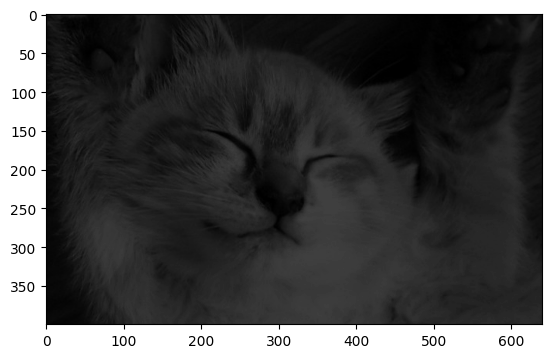

In [11]:
# escolhemos uma imagem escura para analisar
imDark = imagesQ[2]
print ("nivel max: ", np.max(imDark))
plt.imshow (imDark, 'gray', vmin=0, vmax=255)

### Histograma

Vamos ver como está a distribuição das "cores" para a imagem escolhida?

Como deve ser o "aspecto" do histograma para uma imagem "escura"?

Execute o código abaixo e veja o resultado.

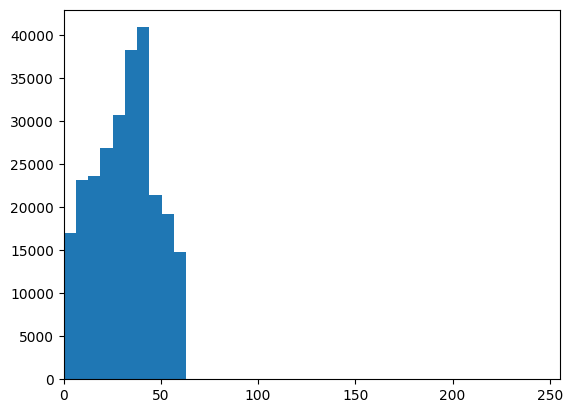

In [12]:
# o primeiro passo eh converter a matriz em um vetor, ou seja, 2D array para 1D
vetor = imDark.ravel ()
plt.hist(vetor)
plt.xlim (0, 255)
plt.show()

### Exemplo de "clareamento" de imagem

Como poderíamos "clarear" a imagem anterior?

Será que aumentando a claridade a gente conseguiria melhorar a visualização?

Execute o trecho de código abaixo e veja o que acontece.


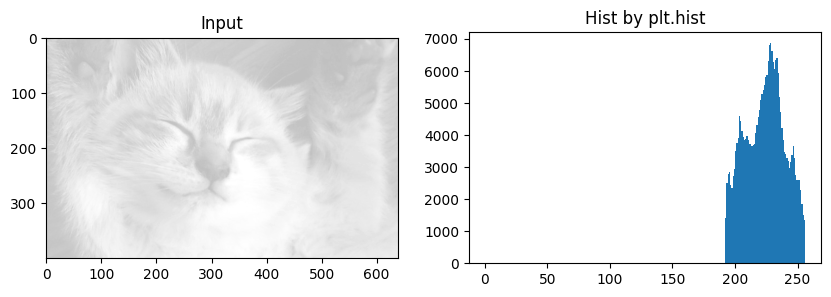

In [13]:
imBright = imDark + 192
plt.figure(figsize=(10,3))
plt.subplot(121),plt.imshow(imBright,"gray", vmin=0, vmax=255),plt.title('Input')
plt.subplot(122),plt.hist(imBright.ravel(),256,[0,256]),plt.title('Hist by plt.hist')
plt.show()

## Equalização de Histogramas

Conforme observado no resultado anterior, apenas clarear uma imagem escura não melhora o contraste da imagem.

Note que precisamos "espalhar" a distribuição dos níveis de cinza ao longo dos valores de 0 a 255.

Ou seja, não adianta escurecer ou clarear a imagem (subtraindo ou adicionando uma constante).

Para espalhar, fazemos uma operação chamada de **equalização**.

A seguir, descrevemos como obter esta operação.




### Distribuição de probabilidades

- Um histograma pode ser definido como uma função de **distribuição de probabilidade** dada por

 $$p(r_k) = \frac{n_k}{n}$$
onde:
- $r_k$ é o $k$-ésimo nível de cinza
- $n_k$ é o número de pixels na imagem com o nível de cinza $r_k$
- $n$ é o número total de pixels na imagem
- $k = {0, 1, 2, \cdots, L – 1}$

A forma do histograma fornece informação sobre a possibilidade de um aprimoramento no contraste.


### Equalização

- Espalhando as frequências em uma imagem (ou equalizando a imagem) é uma forma de melhorar imagens muito escura ou clara ou muito cinza

- Uma fórmula para equalização de histograma é dado por:
  - $r_k$:	intensidade de entrada
  - $s_k$:	intensidade processada (acumulativa)
  
    $$ s_k = T(r_k) = 255\sum_{j=1}^{k}p(r_j) = 255\sum_{j=1}^{k}\frac{n_j}{n} $$
  - $k$: 	a escala de intensidade
  - $n_j$:	a frequência da intensidade $j$
  - $n$:	total de pixels na imagem toda


Note que a fórmula acima nada mais é do que a probabilidade acumulada do nível de cinza $i$ vezes 255.

No trecho de código abaixo, faremos a contagem da quantidade de pixels para cada nível de cinza.

In [14]:
# calculo das frequencias para cada nivel de cinza
freq = [0] * 256
h, w = imDark.shape
for i in range(h):
  for j in range(w):
    freq[imDark[i][j]] += 1
print (freq)

[1405, 2493, 2785, 2849, 2443, 2352, 2711, 2949, 3509, 3764, 3923, 4582, 4427, 4121, 3947, 3856, 3885, 3959, 3854, 3711, 3714, 3669, 3687, 3718, 4053, 4323, 4563, 4782, 5084, 5266, 5416, 5577, 5800, 5872, 6302, 6800, 6864, 6637, 6292, 6049, 6334, 6401, 5947, 5199, 4713, 4223, 3845, 3483, 3403, 3294, 3190, 2962, 3171, 3379, 3673, 3281, 2758, 2591, 2589, 2587, 2279, 1837, 1514, 1354, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


A seguir, calcularemos as probabilidades: para cada nível $i$, é o total obtido pela contagem no passo anterior, dividido pelo total de pixels na imagem.

In [16]:
# calculo das probabilidades para cada nivel de cinza
prob = np.array (freq) / (h*w)
print (prob)

[0.00548828 0.00973828 0.01087891 0.01112891 0.00954297 0.0091875
 0.01058984 0.01151953 0.01370703 0.01470312 0.01532422 0.01789844
 0.01729297 0.01609766 0.01541797 0.0150625  0.01517578 0.01546484
 0.01505469 0.01449609 0.01450781 0.01433203 0.01440234 0.01452344
 0.01583203 0.01688672 0.01782422 0.01867969 0.01985937 0.02057031
 0.02115625 0.02178516 0.02265625 0.0229375  0.02461719 0.0265625
 0.0268125  0.02592578 0.02457812 0.02362891 0.02474219 0.02500391
 0.02323047 0.02030859 0.01841016 0.01649609 0.01501953 0.01360547
 0.01329297 0.01286719 0.01246094 0.01157031 0.01238672 0.01319922
 0.01434766 0.01281641 0.01077344 0.01012109 0.01011328 0.01010547
 0.00890234 0.00717578 0.00591406 0.00528906 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0. 

No trecho abaixo, acumulamos as probabilidades.

Note que a soma final de todas as probabilidades é sempre igual a 1.

In [17]:
# calcula as probabilidades acumuladas
probAc = [0] * 256
probAc[0] = prob[0]
for i in range (1, 256):
  probAc[i] = probAc[i-1] + prob[i]
print (np.array (probAc))

[0.00548828 0.01522656 0.02610547 0.03723438 0.04677734 0.05596484
 0.06655469 0.07807422 0.09178125 0.10648438 0.12180859 0.13970703
 0.157      0.17309766 0.18851563 0.20357813 0.21875391 0.23421875
 0.24927344 0.26376953 0.27827734 0.29260938 0.30701172 0.32153516
 0.33736719 0.35425391 0.37207812 0.39075781 0.41061719 0.4311875
 0.45234375 0.47412891 0.49678516 0.51972266 0.54433984 0.57090234
 0.59771484 0.62364062 0.64821875 0.67184766 0.69658984 0.72159375
 0.74482422 0.76513281 0.78354297 0.80003906 0.81505859 0.82866406
 0.84195703 0.85482422 0.86728516 0.87885547 0.89124219 0.90444141
 0.91878906 0.93160547 0.94237891 0.9525     0.96261328 0.97271875
 0.98162109 0.98879688 0.99471094 1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.

**Pergunta:** Por que a partir de um certo nível de cinza, as somas ficam todas iguais a 1?

No código abaixo, fazemos a multiplicação das probabilidades acumuladas por 255.

In [18]:
# calcula a transformacao de cada nivel de cinza para equalizacao do histograma
h, w = imDark.shape
imEq = imDark.copy()
for i in range(h):
  for j in range(w):
    imEq[i][j] = probAc[imDark[i][j]] * 255

Após a equalização do histograma, como será que o resultado ficou?

Execute o trecho de código abaixo e veja o que acontece.

Text(0.5, 1.0, 'hist equalizado')

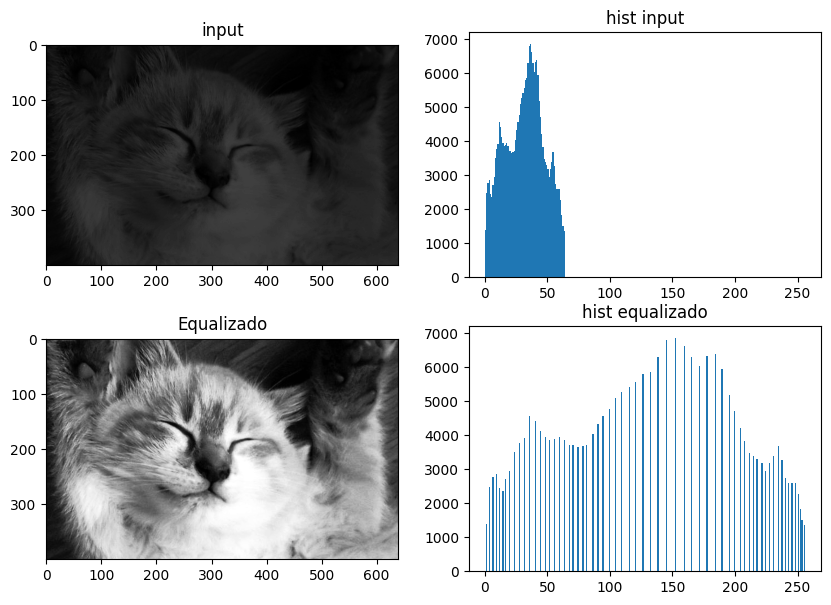

In [19]:
# mostra resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(imDark,"gray", vmin=0, vmax=255)
axs[0, 0].set_title('input')
axs[0, 1].hist(imDark.ravel(),256,[0,256])
axs[0, 1].set_title('hist input')
axs[1, 0].imshow(imEq,"gray", vmin=0, vmax=255)
axs[1, 0].set_title('Equalizado')
axs[1, 1].hist(imEq.ravel(),256,[0,256])
axs[1, 1].set_title('hist equalizado')


# Exercício 1

Aplique a equalização de histograma para a imagem "clara" sem contraste.

Compare o resultado obtido para a imagem clara com o resultado anterior (obtido com a imagem escura).

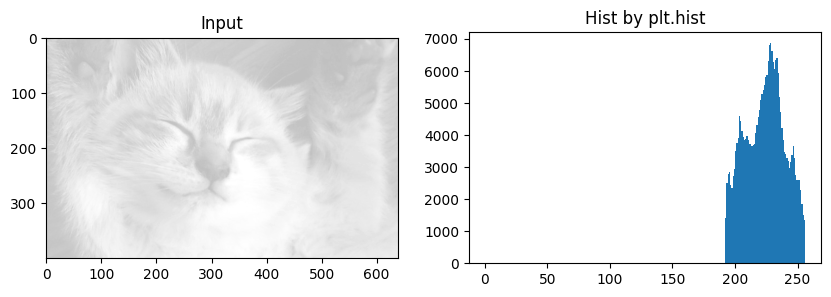

In [20]:
plt.figure(figsize=(10,3))
plt.subplot(121),plt.imshow(imBright,"gray", vmin=0, vmax=255),plt.title('Input')
plt.subplot(122),plt.hist(imBright.ravel(),256,[0,256]),plt.title('Hist by plt.hist')
plt.show()

Text(0.5, 1.0, 'hist equalizado')

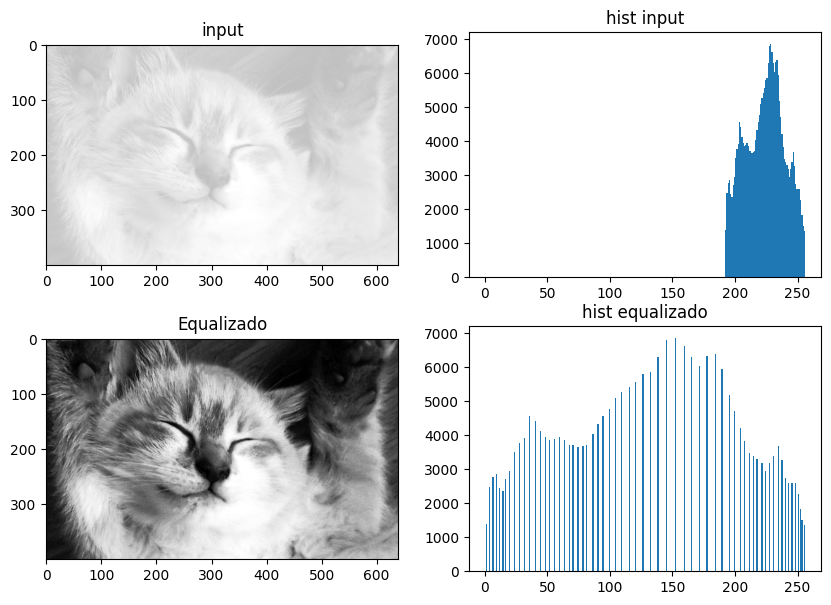

In [35]:
# calculo das frequencias para cada nivel de cinza
freqW = [0] * 256
h1, w1 = imBright.shape
for i in range(h1):
  for j in range(w1):
    freqW[imBright[i][j]] += 1
#print (freqW)

# calculo das probabilidades para cada nivel de cinza
probW = np.array (freqW) / (h1*w1)
#print (probW)

# calcula as probabilidades acumuladas
probAcW = [0] * 256
probAcW[0] = probW[0]
for i in range (1, 256):
  probAcW[i] = probAcW[i-1] + probW[i]
#print (np.array (probAcW))

# calcula a transformacao de cada nivel de cinza para equalizacao do histograma
h1, w1 = imBright.shape
imEqW = imBright.copy()
for i in range(h1):
  for j in range(w1):
    imEqW[i][j] = probAcW[imBright[i][j]] * 255

# mostra resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(imBright,"gray", vmin=0, vmax=255)
axs[0, 0].set_title('input')
axs[0, 1].hist(imBright.ravel(),256,[0,256])
axs[0, 1].set_title('hist input')
axs[1, 0].imshow(imEqW,"gray", vmin=0, vmax=255)
axs[1, 0].set_title('Equalizado')
axs[1, 1].hist(imEqW.ravel(),256,[0,256])
axs[1, 1].set_title('hist equalizado')

# Exercício 2

Uma forma "mais simples" de fazer uma "equalização" seria usando uma "regra de 3".

Você conseguiria deduzir como seria esta forma de equalização?

Calcule o resultado obtido por este outro método e compare com os resultados anteriores.


0 63


Text(0.5, 1.0, 'hist equalizado')

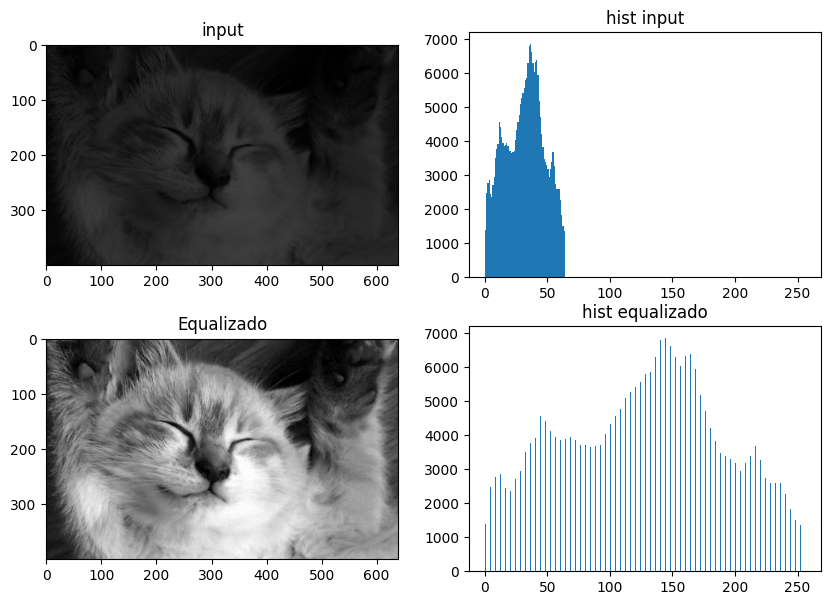

In [33]:
minimo = np.min (imDark)
maximo = np.max (imDark)
print (minimo, maximo)

razao = 255 // (maximo - minimo)

imEqD3 = imDark * razao
# 192 --> 0
# 255 --> 255

# mostra resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(imDark,"gray", vmin=0, vmax=255)
axs[0, 0].set_title('input')
axs[0, 1].hist(imDark.ravel(),256,[0,256])
axs[0, 1].set_title('hist input')
axs[1, 0].imshow(imEqD3,"gray", vmin=0, vmax=255)
axs[1, 0].set_title('Equalizado')
axs[1, 1].hist(imEqD3.ravel(),256,[0,256])
axs[1, 1].set_title('hist equalizado')

# 0 --> 0
# 63 --> 255


192 255


Text(0.5, 1.0, 'hist equalizado')

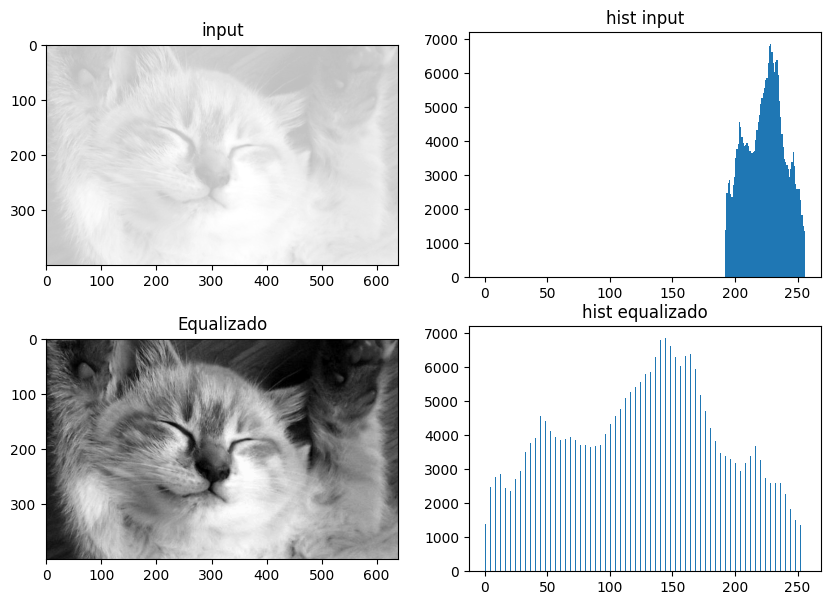

In [39]:
minimo = np.min (imBright)
maximo = np.max (imBright)
print (minimo, maximo)

razao = 255 // (maximo - minimo)

imEqW3 = (imBright - minimo) * razao
# 192 --> 0
# 255 --> 255

# mostra resultados
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs[0, 0].imshow(imBright,"gray", vmin=0, vmax=255)
axs[0, 0].set_title('input')
axs[0, 1].hist(imBright.ravel(),256,[0,256])
axs[0, 1].set_title('hist input')
axs[1, 0].imshow(imEqW3,"gray", vmin=0, vmax=255)
axs[1, 0].set_title('Equalizado')
axs[1, 1].hist(imEqW3.ravel(),256,[0,256])
axs[1, 1].set_title('hist equalizado')